In [3]:
import torch
import torch.nn as nn

from torchvision import transforms

from PIL import Image

In [30]:
# 인코더(Encoder) 정의
classification_vgg = nn.Sequential(
    nn.Conv2d(3, 3, (1, 1)),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(3, 64, (3, 3)),
    nn.ReLU(), # relu1-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 64, (3, 3)),
    nn.ReLU(), # relu1-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 128, (3, 3)),
    nn.ReLU(), # relu2-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 128, (3, 3)),
    nn.ReLU(), # relu2-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 256, (3, 3)),
    nn.ReLU(), # relu3-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(), # relu3-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(), # relu3-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(), # relu3-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 512, (3, 3)),
    nn.ReLU(), # relu4-1, this is the last layer used
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu4-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu4-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu4-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu5-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu5-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu5-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU() # relu5-4
)

# 사전학습된 vgg network와 decoder network의 가중치를 실제 사용할 모델에 로드한다.
classification_vgg.eval()

classification_vgg.load_state_dict(torch.load("./vgg_normalised.pth"))

device = torch.device("cuda")
classification_vgg.to(device)

classification_vgg = nn.Sequential(*list(classification_vgg.children())[:])


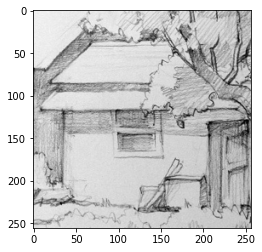

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 전처리 
# 흑백이여야 하지만 color shape은 3shape이여야 함.
image = Image.open("content.jpg").convert("L").resize((256, 256))
image = np.repeat(np.array(image), 3).reshape(256, 256, 3)
                  
plt.imshow(image/255.)

In [71]:
image = Image.fromarray(np.uint8(image)).convert("RGB")
image = transforms.Compose([transforms.ToTensor()])(image).to(device).unsqueeze(0)
print(image.size())

torch.Size([1, 3, 256, 256])


In [72]:
print(classification_vgg(result).size())

torch.Size([1, 512, 16, 16])


In [73]:
class Classification(nn.Module):
    def __init__(self):
        super(Classification, self).__init__()
        self.vgg = vgg
        
        self.fc1 = nn.Linear(512 * 16 * 16, 100, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)

        self.fc2 = nn.Linear(100, 30, bias=True)
        torch.nn.init.xavier_uniform_(selffc2.weight)
        
        self.fc3 = nn.Linear(30, 5, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        
    def forward(self, x):
        out = self.vgg(x)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [74]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.data.shape)

(1797, 64)


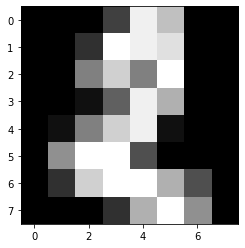

In [75]:
plt.imshow(digits.data[2].reshape(8, 8), cmap="gray")

In [76]:
def preprocessing(path):
    
    # 흑백이여야 하지만 color shape은 3shape이여야 함.
    image = Image.open(path).convert("L").resize((256, 256))
    image = np.repeat(np.array(image), 3).reshape(256, 256, 3)

    return image

In [81]:
import os

abstract_dir = os.listdir("./dataset/abstract")
cityscape_dir = os.listdir("./dataset/cityscape")
landscape_dir = os.listdir("./dataset/landscape")
portrait_dir = os.listdir("./dataset/portrait")
still_life_dir = os.listdir("./dataset/still-life")

In [87]:
abstract_y = np.array([0 for i in range(len(abstract_dir))])
cityscape_y = np.array([0 for i in range(len(cityscape_dir))])
landscape_y = np.array([0 for i in range(len(landscape_dir))])
portrait_y = np.array([0 for i in range(len(portrait_dir))])
still_life_y = np.array([0 for i in range(len(still_life_dir))])

In [89]:
Y = np.concatenate((abstract_y, cityscape_y, landscape_y, portrait_y, still_life_y))

print(Y.shape)

(17000,)


In [91]:
abstract_x = []

for path in abstract_dir:
    abstract_x.append(preprocessing(f"./dataset/abstract/{path}"))

In [93]:
abstract_x = np.array(abstract_x)

In [94]:
print(abstract_x.shape)

(3500, 256, 256, 3)


In [109]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

cityscape_x = []

for path in cityscape_dir:
    cityscape_x.append(preprocessing(f"./dataset/cityscape/{path}"))
    
cityscape_x = np.array(cityscape_x)
print(cityscape_x.shape)

(3500, 256, 256, 3)


In [110]:
landscape_x = []

for path in landscape_dir:
    landscape_x.append(preprocessing(f"./dataset/landscape/{path}"))
    
landscape_x = np.array(landscape_x)
print(landscape_x.shape)

(3500, 256, 256, 3)


In [111]:
portrait_x = []

for path in portrait_dir:
    portrait_x.append(preprocessing(f"./dataset/portrait/{path}"))
    
portrait_x = np.array(portrait_x)
print(portrait_x.shape)

c:\users\simplepro\appdata\local\programs\python\python38\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(3500, 256, 256, 3)


In [112]:
still_life_x = []

for path in still_life_dir:
    still_life_x.append(preprocessing(f"./dataset/still-life/{path}"))
    
still_life_x = np.array(still_life_x)
print(still_life_x.shape)

(3000, 256, 256, 3)


In [114]:
X = np.concatenate((abstract_x, cityscape_x, landscape_x, portrait_x, still_life_x))

print(X.shape)

(17000, 256, 256, 3)
